In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt 
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
# pick the seed for reproducibility - change it to explore the effects of random variations
np.random.seed(0)
import random

# Sample Dataset
As before, we will start with a simple sample dataset with two parameters.

In [2]:
n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.2)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

# Split into train and test dataset
train_x, test_x = np.split(X, [n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])

In [3]:
def plot_dataset(suptitle, features, labels):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    #pylab.subplots_adjust(bottom=0.2, wspace=0.4)
    fig.suptitle(suptitle, fontsize = 16)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')

    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    fig.show()

<IPython.core.display.Javascript object>


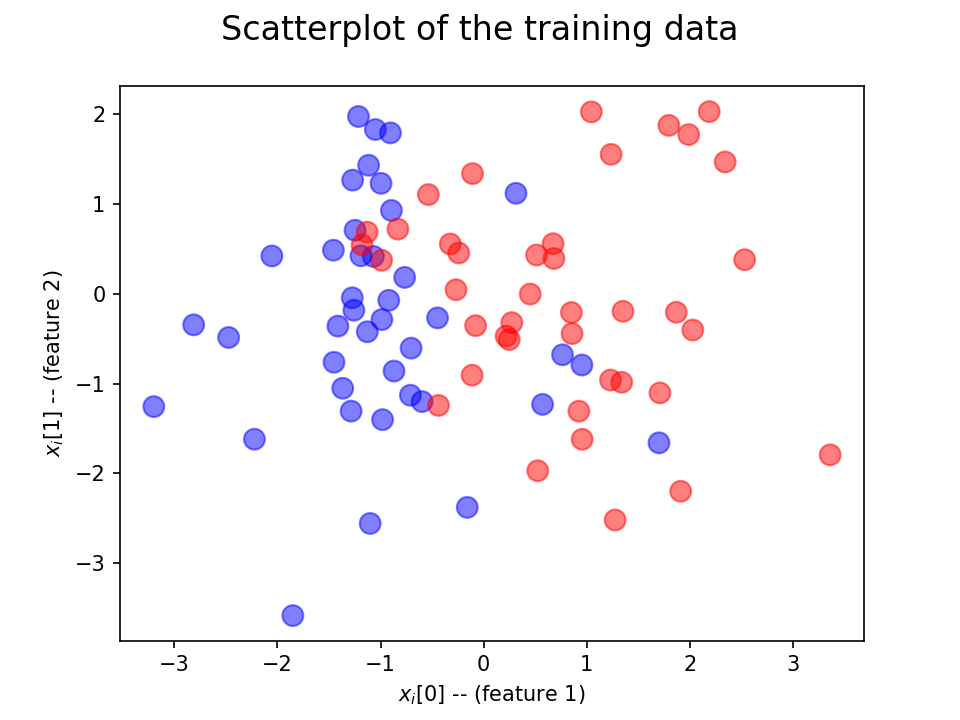

In [4]:
plot_dataset('Scatterplot of the training data', train_x, train_labels)
plt.show()

In [5]:
print(train_x[:5])
print(train_labels[:5])

[[ 1.3382818  -0.98613256]
 [ 0.5128146   0.43299454]
 [-0.4473693  -0.2680512 ]
 [-0.9865851  -0.28692   ]
 [-1.0693829   0.41718036]]
[1 1 0 0 0]


# Machine Learning Problem
Suppose we have input dataset 
, where 
 is a set of features, and 
 - corresponding labels. For regression problem, 
, and for classification it is represented by a class number 
.

Any machine learning model can be represented by function 
, where 
 is a set of parameters. Our goal is to find such parameters 
 that our model fits the dataset in the best way. The criteria is defined by loss function 
, and we need to find optimal value


Loss function depends on the problem being solved.

Loss functions for regression
For regression, we often use abosolute error 
, or mean squared error: 
Suppose we have input dataset (X,Y)
, where X
 is a set of features, and Y
 - corresponding labels. For regression problem, 
, and for classification it is represented by a class number 
.

Any machine learning model can be represented by function 
, where 
 is a set of parameters. Our goal is to find such parameters 
 that our model fits the dataset in the best way. The criteria is defined by loss function 
, and we need to find optimal value


Loss function depends on the problem being solved.

Loss functions for regression
For regression, we often use abosolute error 
, or mean squared error: 


In [6]:
# helper function for plotting various loss functions
def plot_loss_functions(suptitle, functions, ylabels, xlabel):
    fig, ax = plt.subplots(1,len(functions), figsize=(9, 3))
    plt.subplots_adjust(bottom=0.2, wspace=0.4)
    fig.suptitle(suptitle)
    for i, fun in enumerate(functions):
        ax[i].set_xlabel(xlabel)
        if len(ylabels) > i:
            ax[i].set_ylabel(ylabels[i])
        ax[i].plot(x, fun)
    plt.show()

<IPython.core.display.Javascript object>


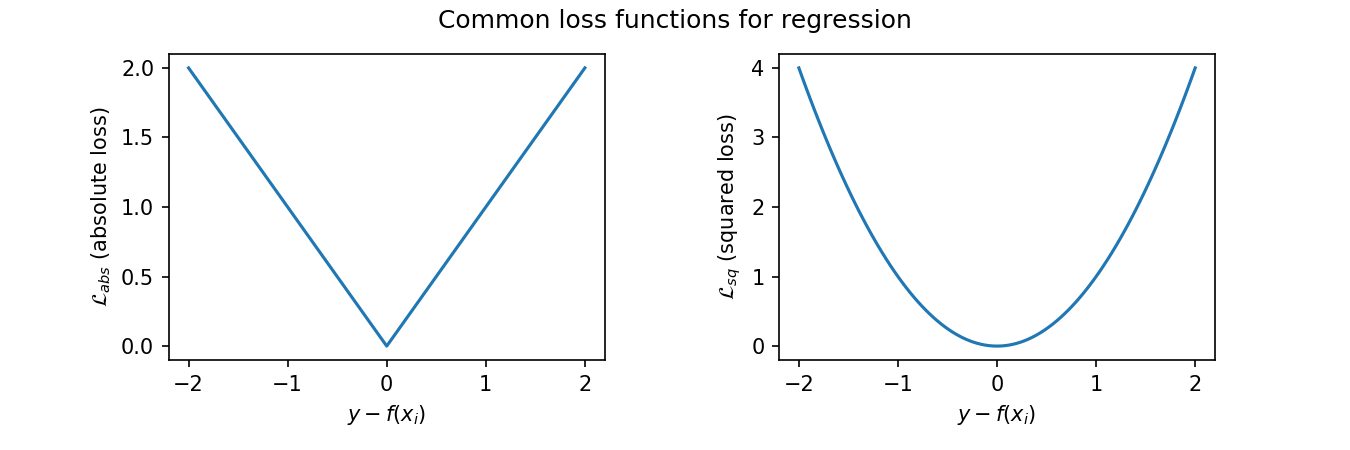

In [7]:
x = np.linspace(-2, 2, 101)
plot_loss_functions(
    suptitle = 'Common loss functions for regression',
    functions = [np.abs(x), np.power(x, 2)],
    ylabels   = ['$\mathcal{L}_{abs}}$ (absolute loss)',
                 '$\mathcal{L}_{sq}$ (squared loss)'],
    xlabel    = '$y - f(x_i)$')

# Loss functions for classification
Let's consider binary classification for a moment. In this case we have two classes, numbered 0 and 1. The output of the network 
 essentially defines the probability of choosing the class 1.

0-1 loss

0-1 loss is the same as calculating accuracy of the model - we compute the number of correct classifications:

 
 

However, accuracy itself does not show how far are we from the right classification. It could be that we missed the correct class just by a little bit, and that is in a way "better" (in a sense that we need to correct weights much less) than missing significantly. Thus, more often logistic loss is used, which takes this into account.

In [8]:
x = np.linspace(0,1,100)
def zero_one(d):
    if d < 0.5:
        return 0
    return 1
zero_one_v = np.vectorize(zero_one)

def logistic_loss(fx):
    # assumes y == 1
    return -np.log(fx)

C:\Users\CR3003TU\AppData\Local\Temp\ipykernel_7532\331859503.py:10: RuntimeWarning: divide by zero encountered in log
  return -np.log(fx)


<IPython.core.display.Javascript object>


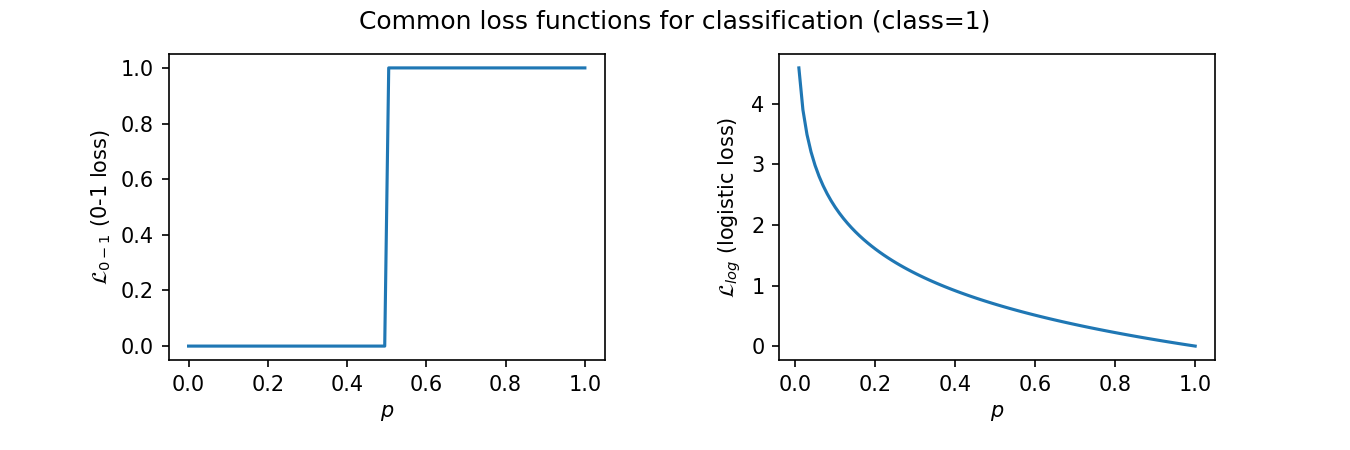

In [9]:
plot_loss_functions(suptitle = 'Common loss functions for classification (class=1)',
                   functions = [zero_one_v(x), logistic_loss(x)],
                   ylabels    = ['$\mathcal{L}_{0-1}}$ (0-1 loss)',
                                 '$\mathcal{L}_{log}$ (logistic loss)'],
                   xlabel     = '$p$')

To understand logistic loss, consider two cases of the expected output:

If we expect output to be 1 (
), then the loss is 
. The loss is 0 is the network predicts 1 with probability 1, and grows larger when probability of 1 gets smaller.
If we expect output to be 0 (
), the loss is 
. Here, 
 is the probability of 0 which is predicted by the network, and the meaning of log-loss is the same as described in the previous case
# Neural Network Architecture
We have generated a dataset for binary classification problem. However, let's consider it as multi-class classification right from the start, so that we can then easily switch our code to multi-class classification. In this case, our one-layer perceptron will have the following architecture:



Two outputs of the network correspond to two classes, and the class with highest value among two outputs corresponds to the right solution.

The model is defined as
where
are parameters.

We will define this linear layer as a Python class with a forward function that performs the calculation. It receives input value x
, and produces the output of the layer. Parameters W and b are stored within the layer class, and are initialized upon creation with random values and zeroes respectively.

In [10]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        
    def forward(self, x):
        return np.dot(x, self.W.T) + self.b
    
net = Linear(2,2)
net.forward(train_x[0:5])

array([[ 1.77202116, -0.25384488],
       [ 0.28370828, -0.39610552],
       [-0.30097433,  0.30513182],
       [-0.8120485 ,  0.56079421],
       [-1.23519653,  0.3394973 ]])

 In many cases, it is more efficient to operate not on the one input value, but on the vector of input values. Because we use Numpy operations, we can pass a vector of input values to our network, and it will give us the vector of output values.

# Softmax: Turning Outputs into Probabilities
As you can see, our outputs are not probabilities - they can take any values. In order to convert them into probabilities, we need to normalize the values across all classes. This is done using softmax function:
 


Output of the network 
 can be interpreted as probability distribution on the set of classes 
: 

We will define the Softmax layer in the same manner, as a class with forward function:

In [12]:
class Softmax:
    def forward(self,z):
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z

softmax = Softmax()
softmax.forward(net.forward(train_x[0:10]))

array([[0.88348621, 0.11651379],
       [0.66369714, 0.33630286],
       [0.35294795, 0.64705205],
       [0.20216095, 0.79783905],
       [0.17154828, 0.82845172],
       [0.24279153, 0.75720847],
       [0.18915732, 0.81084268],
       [0.17282951, 0.82717049],
       [0.13897531, 0.86102469],
       [0.72746882, 0.27253118]])

You can see that we are now getting probabilities as outputs, i.e. the sum of each output vector is exactly 1.

In case we have more than 2 classes, softmax will normalize probabilities across all of them. Here is a diagram of network architecture that does MNIST digit classification:

MNIST Classifier

# Cross-Entropy Loss
A loss function in classification is typically a logistic function, which can be generalized as cross-entropy loss. Cross-entropy loss is a function that can calculate similarity between two arbitrary probability distributions. You can find more detailed discussion about it on Wikipedia.

In our case, first distribution is the probabilistic output of our network, and the second one is so-called one-hot distribution, which specifies that a given class 
 has corresponding probability 1 (all the rest being 0). In such a case cross-entropy loss can be calculated as 
, where 
 is the expected class, and 
 is the corresponding probability of this class given by our neural network.

If the network return probability 1 for the expected class, cross-entropy loss would be 0. The closer the probability of the actual class is to 0, the higher is cross-entropy loss (and it can go up to infinity!).

In [13]:
def plot_cross_ent():
    p = np.linspace(0.01, 0.99, 101) # estimated probability p(y|x)
    cross_ent_v = np.vectorize(cross_ent)
    f3, ax = plt.subplots(1,1, figsize=(8, 3))
    l1, = plt.plot(p, cross_ent_v(p, 1), 'r--')
    l2, = plt.plot(p, cross_ent_v(p, 0), 'r-')
    plt.legend([l1, l2], ['$y = 1$', '$y = 0$'], loc = 'upper center', ncol = 2)
    plt.xlabel('$\hat{p}(y|x)$', size=18)
    plt.ylabel('$\mathcal{L}_{CE}$', size=18)
    plt.show()

<IPython.core.display.Javascript object>


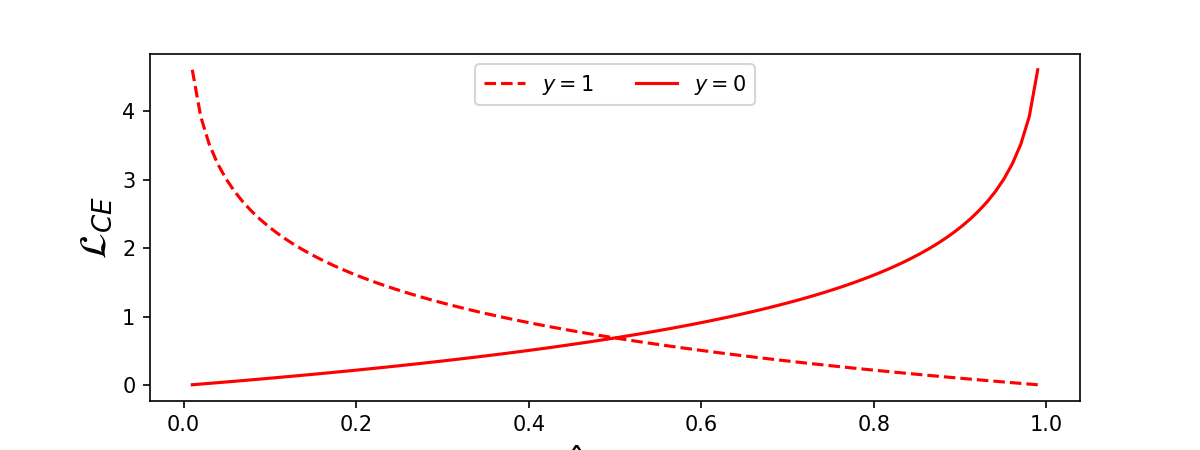

In [14]:
def cross_ent(prediction, ground_truth):
    t = 1 if ground_truth > 0.5 else 0
    return -t * np.log(prediction) - (1 - t) * np.log(1 - prediction)
plot_cross_ent()

Cross-entropy loss will be defined again as a separate layer, but forward function will have two input values: output of the previous layers of the network p, and the expected class y:

In [15]:
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean() # average over all input samples

cross_ent_loss = CrossEntropyLoss()
p = softmax.forward(net.forward(train_x[0:10]))
cross_ent_loss.forward(p,train_labels[0:10])

1.429664938969559

IMPORTANT: Loss function returns a number that shows how good (or bad) our network performs. It should return us one number for the whole dataset, or for the part of the dataset (minibatch). Thus after calculating cross-entropy loss for each individual component of the input vector, we need to average (or add) all components together - which is done by the call to .mean().

# Computational Graph


Up to this moment, we have defined different classes for different layers of the network. Composition of those layers can be represented as computational graph. Now we can compute the loss for a given training dataset (or part of it) in the following manner:

In [16]:
z = net.forward(train_x[0:10])
p = softmax.forward(z)
loss = cross_ent_loss.forward(p,train_labels[0:10])
print(loss)

1.429664938969559


# Loss Minimization Problem and Network Training
Once we have defined out network as 
, and given the loss function 
, we can consider 
 as a function of 
 under our fixed training dataset: 

In this case, the network training would be a minimization problem of 
 under argument 
:

There is a well-known method of function optimization called gradient descent. The idea is that we can compute a derivative (in multi-dimensional case call gradient) of loss function with respect to parameters, and vary parameters in such a way that the error would decrease.

Gradient descent works as follows:

Initialize parameters by some random values 
, 
Repeat the following step many times:
 
 
 

During training, the optimization steps are supposed to be calculated considering the whole dataset (remember that loss is calculated as a sum/average through all training samples). However, in real life we take small portions of the dataset called minibatches, and calculate gradients based on a subset of data. Because subset is taken randomly each time, such method is called stochastic gradient descent (SGD).

# Backward Propagation


 
 
 
 
 
 
 
 
 

To compute 
 we can use the chaining rule for computing derivatives of a composite function, as you can see in the formulae above. It corresponds to the following idea:

Suppose under given input we have obtanes loss 
To minimize it, we would have to adjust softmax output 
 by value 
This corresponds to the changes to node 
 by 
To minimize this error, we need to adjust parameters accordingly: 
 (and the same for 
)


This process starts distributing the loss error from the output of the network back to its parameters. Thus the process is called back propagation.

One pass of the network training consists of two parts:

Forward pass, when we calculate the value of loss function for a given input minibatch
Backward pass, when we try to minimize this error by distributing it back to the model parameters through the computational graph.
# Implementation of Back Propagation
Let's add backward function to each of our nodes that will compute the derivative and propagate the error during the backward pass.
We also need to implement parameter updates according to the procedure described above
We need to compute derivatives for each layer manually, for example for linear layer 
:
 
 
 

If we need to compensate for the error 
 at the output of the layer, we need to update the weights accordingly:
 
 
 

IMPORTANT: Calculations are done not for each training sample independently, but rather for a whole minibatch. Required parameter updates 
 and 
 are computed across the whole minibatch, and the respective vectors have dimensions: 


In [17]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

In the same manner we can define backward function for the rest of our layers:

In [18]:
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p

# Training the Model
Now we are ready to write the training loop, which will go through our dataset, and perform the optimization minibatch by minibatch.One complete pass through the dataset is often called an epoch:

In [19]:
lin = Linear(2,2)
softmax = Softmax()
cross_ent_loss = CrossEntropyLoss()

learning_rate = 0.1

pred = np.argmax(lin.forward(train_x),axis=1)
acc = (pred==train_labels).mean()
print("Initial accuracy: ",acc)

batch_size=4
for i in range(0,len(train_x),batch_size):
    xb = train_x[i:i+batch_size]
    yb = train_labels[i:i+batch_size]
    
    # forward pass
    z = lin.forward(xb)
    p = softmax.forward(z)
    loss = cross_ent_loss.forward(p,yb)
    
    # backward pass
    dp = cross_ent_loss.backward(loss)
    dz = softmax.backward(dp)
    dx = lin.backward(dz)
    lin.update(learning_rate)
    
pred = np.argmax(lin.forward(train_x),axis=1)
acc = (pred==train_labels).mean()
print("Final accuracy: ",acc)

Initial accuracy:  0.725
Final accuracy:  0.825


Nice to see how we can increase accuracy of the model from about 50% to around 80% in one epoch.

# Network Class
Since in many cases neural network is just a composition of layers, we can build a class that will allow us to stack layers together and make forward and backward passes through them without explicitly programming that logic. We will store the list of layers inside the Net class, and use add() function to add new layers:

In [20]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)

With this Net class our model definition and training becomes more neat:

In [21]:
net = Net()
net.add(Linear(2,2))
net.add(Softmax())
loss = CrossEntropyLoss()

def get_loss_acc(x,y,loss=CrossEntropyLoss()):
    p = net.forward(x)
    l = loss.forward(p,y)
    pred = np.argmax(p,axis=1)
    acc = (pred==y).mean()
    return l,acc

print("Initial loss={}, accuracy={}: ".format(*get_loss_acc(train_x,train_labels)))

def train_epoch(net, train_x, train_labels, loss=CrossEntropyLoss(), batch_size=4, lr=0.1):
    for i in range(0,len(train_x),batch_size):
        xb = train_x[i:i+batch_size]
        yb = train_labels[i:i+batch_size]

        p = net.forward(xb)
        l = loss.forward(p,yb)
        dp = loss.backward(l)
        dx = net.backward(dp)
        net.update(lr)
 
train_epoch(net,train_x,train_labels)
        
print("Final loss={}, accuracy={}: ".format(*get_loss_acc(train_x,train_labels)))
print("Test loss={}, accuracy={}: ".format(*get_loss_acc(test_x,test_labels)))

Initial loss=0.6212072429381601, accuracy=0.6875: 
Final loss=0.44369925927417986, accuracy=0.8: 
Test loss=0.4767711377257787, accuracy=0.85: 


# Plotting the Training Process
It would be nice to see visually how the network is being trained! We will define a train_and_plot function for that. To visualize the state of the network we will use level map, i.e. we will represent different values of the network output using different colors.

Do not worry if you do not understand some of the plotting code below - it is more important to understand the underlying neural network concepts.

In [22]:
def train_and_plot(n_epoch, net, loss=CrossEntropyLoss(), batch_size=4, lr=0.1):
    fig, ax = plt.subplots(2, 1)
    ax[0].set_xlim(0, n_epoch + 1)
    ax[0].set_ylim(0,1)

    train_acc = np.empty((n_epoch, 3))
    train_acc[:] = np.NAN
    valid_acc = np.empty((n_epoch, 3))
    valid_acc[:] = np.NAN

    for epoch in range(1, n_epoch + 1):

        train_epoch(net,train_x,train_labels,loss,batch_size,lr)
        tloss, taccuracy = get_loss_acc(train_x,train_labels,loss)
        train_acc[epoch-1, :] = [epoch, tloss, taccuracy]
        vloss, vaccuracy = get_loss_acc(test_x,test_labels,loss)
        valid_acc[epoch-1, :] = [epoch, vloss, vaccuracy]
        
        ax[0].set_ylim(0, max(max(train_acc[:, 2]), max(valid_acc[:, 2])) * 1.1)

        plot_training_progress(train_acc[:, 0], (train_acc[:, 2],
                                                 valid_acc[:, 2]), fig, ax[0])
        plot_decision_boundary(net, fig, ax[1])
        fig.canvas.draw()
        fig.canvas.flush_events()

    return train_acc, valid_acc

In [23]:
import matplotlib.cm as cm

def plot_decision_boundary(net, fig, ax):
    draw_colorbar = True
    # remove previous plot
    while ax.collections:
        ax.collections.pop()
        draw_colorbar = False

    # generate countour grid
    x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
    y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid_points = np.c_[xx.ravel().astype('float32'), yy.ravel().astype('float32')]
    n_classes = max(train_labels)+1
    while train_x.shape[1] > grid_points.shape[1]:
        # pad dimensions (plot only the first two)
        grid_points = np.c_[grid_points,
                            np.empty(len(xx.ravel())).astype('float32')]
        grid_points[:, -1].fill(train_x[:, grid_points.shape[1]-1].mean())

    # evaluate predictions
    prediction = np.array(net.forward(grid_points))
    # for two classes: prediction difference
    if (n_classes == 2):
        Z = np.array([0.5+(p[0]-p[1])/2.0 for p in prediction]).reshape(xx.shape)
    else:
        Z = np.array([p.argsort()[-1]/float(n_classes-1) for p in prediction]).reshape(xx.shape)
    
    # draw contour
    levels = np.linspace(0, 1, 40)
    cs = ax.contourf(xx, yy, Z, alpha=0.4, levels = levels)
    if draw_colorbar:
        fig.colorbar(cs, ax=ax, ticks = [0, 0.5, 1])
    c_map = [cm.jet(x) for x in np.linspace(0.0, 1.0, n_classes) ]
    colors = [c_map[l] for l in train_labels]
    ax.scatter(train_x[:, 0], train_x[:, 1], marker='o', c=colors, s=60, alpha = 0.5)

In [24]:
def plot_training_progress(x, y_data, fig, ax):
    styles = ['k--', 'g-']
    # remove previous plot
    while ax.lines:
        ax.lines.pop()
    # draw updated lines
    for i in range(len(y_data)):
        ax.plot(x, y_data[i], styles[i])
    ax.legend(ax.lines, ['training accuracy', 'validation accuracy'],
              loc='upper center', ncol = 2)

<IPython.core.display.Javascript object>


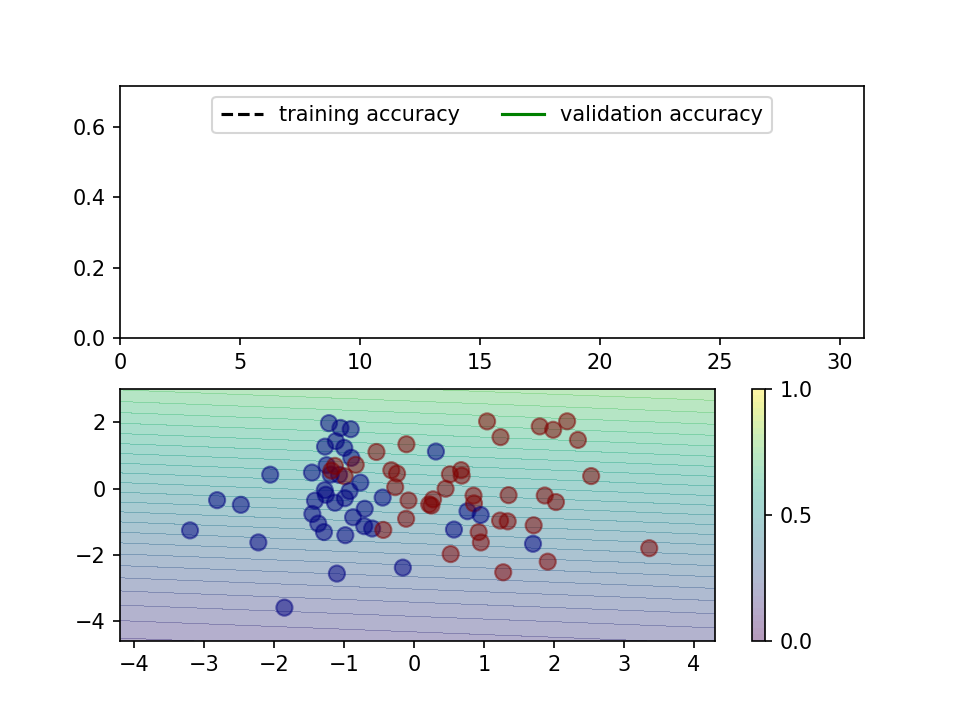

AttributeError: 'ArtistList' object has no attribute 'pop'

In [25]:
%matplotlib nbagg 
net = Net()
net.add(Linear(2,2))
net.add(Softmax())

res = train_and_plot(30,net,lr=0.005)

After running the cell above you should be able to see interactively how the boundary between classes change during training. Note that we have chosen very small learning rate so that we can see how the process happens.

# Multi-Layered Models
The network above has been constructed from several layers, but we still had only one Linear layer, which does the actual classification. What happens if we decide to add several such layers?

Surprisingly, our code will work! Very important thing to note, however, is that in between linear layers we need to have a non-linear activation function, such as tanh. Without such non-linearity, several linear layers would have the same expressive power as just one layers - because composition of linear functions is also linear!

In [26]:
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy

Adding several layers make sense, because unlike one-layer network, multi-layered model will be able to accuratley classify sets that are not linearly separable. I.e., a model with several layers will be reacher.

It can be demonstrated that with sufficient number of neurons a two-layered model is capable to classifying any convex set of data points, and three-layered network can classify virtually any set.

Mathematically, multi-layered perceptron would be represented by a more complex function 
 that can be computed in several steps:

Here, 
 is a non-linear activation function, 
 is a softmax function, and 
 are parameters.

The gradient descent algorithm would remain the same, but it would be more difficult to calculate gradients. Given the chain differentiation rule, we can calculate derivatives as:

 
 
 
 
 
 
 
 
 
 
 

Note that the beginning of all those expressions is still the same, and thus we can continue back propagation beyond one linear layers to adjust further weights up the computational graph.

Let's now experiment with two-layered network:

In [27]:
net = Net()
net.add(Linear(2,10))
net.add(Tanh())
net.add(Linear(10,2))
net.add(Softmax())
loss = CrossEntropyLoss()

<IPython.core.display.Javascript object>


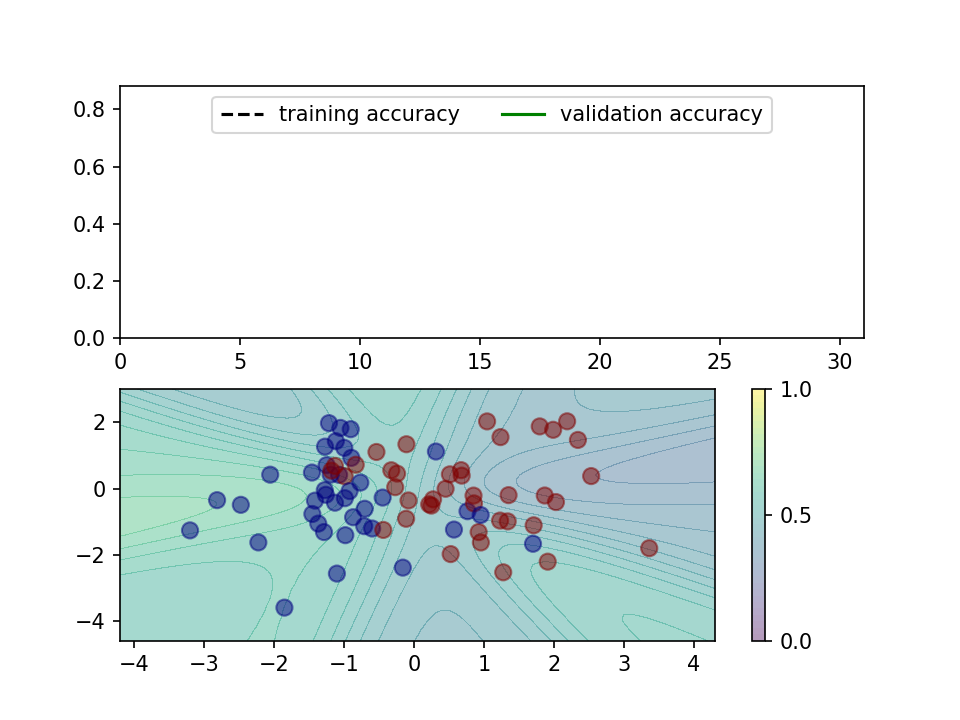

AttributeError: 'ArtistList' object has no attribute 'pop'

In [28]:
res = train_and_plot(30,net,lr=0.01)

# Why Not Always Use Multi-Layered Model?
We have seen that multi-layered model is more powerful and expressive, than one-layered one. You may be wondering why don't we always use many-layered model. The answer to this question is overfitting.

We will deal with this term more in a later sections, but the idea is the following: the more powerful the model is, the better it can approximate training data, and the more data it needs to properly generalize for the new data it has not seen before.

A linear model:

We are likely to get high training loss - so-called underfitting, when the model does not have enough power to correctly separate all data.
Valiadation loss and training loss are more or less the same. The model is likely to generalize well to test data.
Complex multi-layered model

Low training loss - the model can approximate training data well, because it has enough expressive power.
Validation loss can be much higher than training loss and can start to increase during training - this is because the model "memorizes" training points, and loses the "overall picture"
Overfitting

On this picture, x stands for training data, o - validation data. Left - linear model (one-layer), it approximates the nature of the data pretty well. Right - overfitted model, the model perfectly well approximates training data, but stops making sense with any other data (validation error is very high)

# Takeaways
Simple models (fewer layers, fewer neurons) with low number of parameters ("low capacity") are less likely to overfit
More complex models (more layers, more neurons on each layer, high capacity) are likely to overfit. We need to monitor validation error to make sure it does not start to rise with further training
More complex models need more data to train on.
You can solve overfitting problem by either:
simplifying your model
increasing the amount of training data
Bias-variance trade-off is a term that shows that you need to get the compromise
between power of the model and amount of data,
between overfittig and underfitting
There is not single recipe on how many layers of parameters you need - the best way is to experiment
# Credits
This notebook is a part of AI for Beginners Curricula, and has been prepared by Dmitry Soshnikov. It is inspired by Neural Network Workshop at Microsoft Research Cambridge. Some code and illustrative materials are taken from presentations by Katja Hoffmann, Matthew Johnson and Ryoto Tomioka, and from NeuroWorkshop repository.